# Mismatch dependance of Gain predicted by our "oscillators model"

Here we consider the predictions of our model for ONE OF the "second order" processes that amplificate outside the crystal the field with the signal frequency ([(ws-wp), wp]->ws). We have not yet done the calculations for the other processes, but probably the gain dependence from the "phase mismatch" dK is the same, even if dK is defined differently. 

Here we consider being VERY FAR from the crystal end

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def outside_field(dK, N = 100):
    # Outside field Amplitude; the proper value of the field is the amplitude multiplied by a phase
    # that depends on position x and by 1/(x)^3 (if you are VERY FAR from the crystal).
    # dK is the "phase MISmatch" value, meaning dK = 0 is the phase matching condition 
    
    sum = 0
    for n in np.arange(0,N):
        for m in np.arange(0,N):
            if(n!=m):
                sum = sum + (1/(np.abs(n-m))**3)*np.exp(-1j*(n-m)*dK)
    return np.abs(sum)

In [107]:
N = 100 #Number of points in the lattice
# The value of the field outside should be independent on N and lattice spacing separately, because
# how many points consider in the lattice is my choice! (but the dipole moment of each point in the lattice obv depends on the spacing (or
# equivalently the N) chosen)

x = np.arange(-2,2,0.01) # Plot the outside field Amplitude for "dK" in this range
y = outside_field(x,N)

2.39


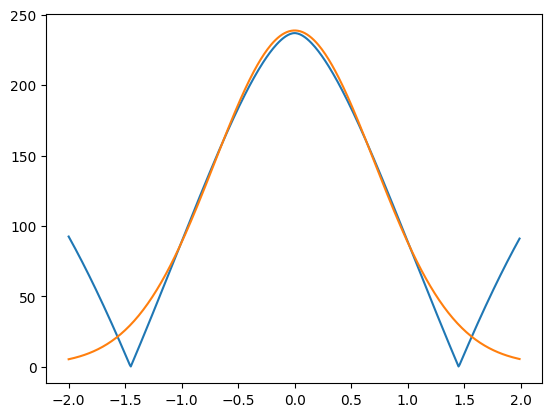

In [110]:
plt.figure()
ax = plt.axes()

# Model predicted amplitude
ax.plot(x,y)

# Function we try to Compare with
A=1
a=np.arccosh(2.39*N - 1)
print((np.cosh(a)+1)/N)
#y_ = 1+a/(a-(x/2)**2)*(np.sinh(N*(a-(x/2)**2)))**2
y_ = 1+A*np.cosh(a-x**2)

ax.plot(x,y_)

2.3713151233156493
2.387689465546519
2.393158690297492
2.3958953859785113


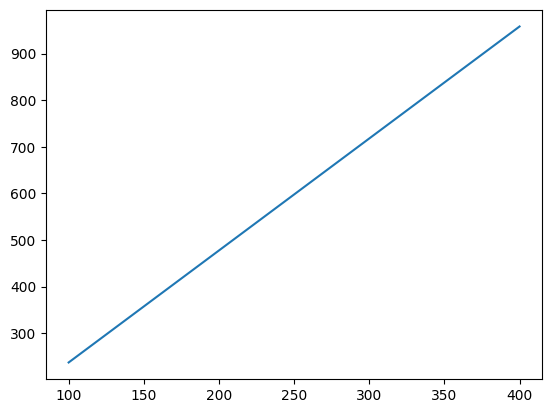

In [90]:
# Check how the amplitude at phase matching (dk = 0) depends on the crystal lenght (increasing N)
x = np.arange(-0.5,0.5,0.01)
i = 0
Ns = np.arange(100,500,100)
y = np.zeros(len(Ns))
for N in Ns:
    y[i] = outside_field(dK=0, N=N)
    i = i + 1

plt.plot(Ns,heights)